In [1]:
# import libraries
import time
import random as r
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# settings
sns.reset_orig
sns.set_style('darkgrid')
sns.set_palette('Set1')

np.set_printoptions(linewidth=200)

In [3]:
# initialize the random state using a seed
epoch = int(time.time())
r.seed(epoch)

print(f'Seeded at {epoch}.')

Seeded at 1656422885.


In [4]:
# create random coordinate function (-100 < X < 100)
rcoord = lambda: r.random() * 100 * (-1 if r.randrange(2) else 1)

In [5]:
# create set of locations
i_data = pd.DataFrame()
len_ = 15

i_data['X'] = [rcoord() for _ in range(len_)]
i_data['Y'] = [rcoord() for _ in range(len_)]

i_data.head(10)

,X,Y
0,41.106952,-18.376940
1,-13.820990,5.266214
2,15.770631,29.128957
3,86.126085,-24.089809
4,61.078549,52.312050
5,4.162820,-37.403961
6,30.199821,-6.476380
7,-5.888589,-44.925479
8,-75.208105,-78.876296
9,-20.704530,-22.088188


Text(0.5, 1.0, 'Locations')

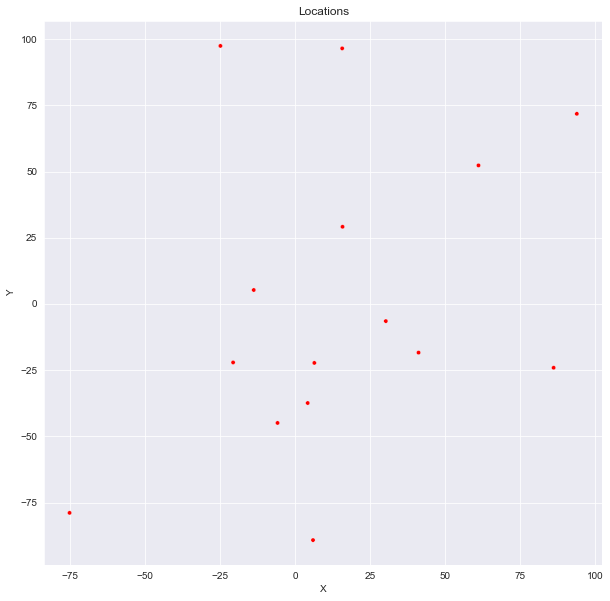

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='X', y='Y', data=i_data, size=1, color='red', legend=False, label="Locations")
plt.title('Locations')

In [7]:
# create distance matrix
eucl = lambda x1, y1, x2, y2: ((x1 - x2)**2 + (y1 - y2)**2)**0.5

i_loc = i_data[['X', 'Y']].values
j_loc = i_data[['X', 'Y']].values

dist_ij = np.array([[eucl(i[0],i[1],j[0],j[1]) for j in j_loc] for i in i_loc])
dist_ij

array([[  0.        ,  59.80031381,  53.8399427 ,  45.38016307,  73.45609612,  41.55594269,  16.14276423,  53.9759731 , 131.10821631,  61.92279566, 117.65289493, 104.45878928,  34.95251392,
         79.03592079, 133.30411354],
       [ 59.80031381,   0.        ,  38.01439878, 104.16906365,  88.4491471 ,  46.30508868,  45.56007357,  50.81465328, 104.15536379,  28.20720503,  95.86402373, 126.56957352,  34.14145232,
         96.46371681,  92.82173323],
       [ 53.8399427 ,  38.01439878,   0.        ,  88.21636426,  50.894629  ,  67.5379182 ,  38.41798475,  77.15686078, 141.21708433,  62.87792335,  67.35955774,  88.98011448,  52.24541702,
        118.69111928,  79.50038831],
       [ 45.38016307, 104.16906365,  88.21636426,   0.        ,  80.40287983,  83.03760232,  58.63428913,  94.3441848 , 170.3827452 , 106.84936458, 139.66481676,  96.1830961 ,  79.77573224,
        103.26922145, 164.61551895],
       [ 73.45609612,  88.4491471 ,  50.894629  ,  80.40287983,   0.        , 106.2467072 , 

In [8]:
# save new data to files
with pd.ExcelWriter('data.xlsx', mode='w') as writer:
    i_data.to_excel(writer, sheet_name='i_data', index=False)
    pd.DataFrame(dist_ij).to_excel(writer, sheet_name='dist_ij', index=False)
    
print('Done')

Done
